## Density‐based Clustering是什麼嗎?
* 一種以「密度」(denstiy)為基礎的分群演算法。
* 可以處理non-convex的狀況(例如不規則的河流等)
* 有別於「K-means」，不需要事先設定要分幾群
* 可以區別離群值(outlier)
* 運用領域：犯罪空間、球員投球區分析

## 示意圖
<img src=dbscan.PNG width=50% />

## 演算法介紹

#### > 需要兩個參數

* ε  (eps)，以ε參數值為半徑劃出的圓型區域稱為 ε-鄰域。<img src=a1.PNG width=30% />

* minPts，高密度區域內需要最少有幾個點。<img src=a2.PNG width=20% />


#### > 點與點的關係 （圖一）

* Directly density‐reachable
* Density‐reachable
* Density‐connected

#### > 三種點的分類（圖二）

* 核心點(core)：此點以ε以內有超過或包含minPts的點
* 邊緣點(border)：此點以ε以內有少於minPts的點，但跟核心點是鄰居。
* 離群點(noise)：此點以ε以內有少於minPts的點，非核心點、邊緣點者，即是離群點。

#### >demo web

* Visualizing DBSCAN Clustering：https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### 圖一 
<img src=Algorithm.png width=40% align="left"/>


### 圖二 

<img src=a3.PNG width=40% />

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = 0
NOISE = -1

In [2]:
# compute and return the euclidean distance
def _dist(p,q):
    d1=[m[0,p],m[1,p]]
    d2=[m[0,q],m[1,q]]
    dist=((d1[0]-d2[0])**2+(d1[1]-d2[1])**2)**(1/2)
    return dist

In [3]:
# check if the distance between p and q is below eps
# return True or False
def _eps_neighborhood(p,q,eps):
    dist=_dist(p,q)
    if (dist<=eps):
        return True
    else:
        return False

In [4]:
# find and return all points that belong to eps-neighborhood of point_id
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    for x in range(0,n_points):
        if x==point_id:
            continue
        else:
            if _eps_neighborhood(point_id,x,eps)==True:
                seeds.append(x)           
    return seeds

In [5]:
# expand the cluster of cluster_id from point_id
# identify all points belonging to cluster_id
# update the clustering results in "classification" by assigning cluster_id to each point
# return True if point_id is a core, False if point_id is not a core
def _update_cluster(m, classifications, point_id, cluster_id, eps, min_points,core_points):
    neighborhood=_region_query(m, point_id, eps)
    if len(neighborhood)>=min_points-1:
            core_points[point_id]=1
    neighborhood_core=core_points.iloc[neighborhood]
    neighborhood_core=neighborhood_core[neighborhood_core!=0]
    if(sum(neighborhood_core)==0):
        if len(neighborhood)>=min_points-1:
            classifications.iloc[neighborhood]=cluster_id
            classifications.iloc[point_id]=cluster_id
            cluster_id=cluster_id+1
    else:
        join_cluster=classifications.iloc[neighborhood_core.index[0]]
        classifications.iloc[point_id]=join_cluster
        for x in range(0,len(neighborhood_core.index)):
            classifications[classifications==classifications.iloc[neighborhood_core.index[x]]]=join_cluster
    return core_points,classifications,cluster_id

In [6]:
#main code
def dbscan(m, eps, min_points):
    cluster_id = 1
    n_points = m.shape[1]
    classifications = pd.Series([UNCLASSIFIED] * n_points)
    core_points= pd.Series([UNCLASSIFIED] * n_points)
    for point_id in range(0,n_points):
        core_points,classifications,cluster_id=_update_cluster(m, classifications, point_id, cluster_id, eps, min_points,core_points)
    double_check=classifications[classifications==0].index
    for point_id in double_check:
        core_points,classifications,cluster_id=_update_cluster(m, classifications, point_id, cluster_id, eps, min_points,core_points)
    classifications[classifications==0]=NOISE
    # the main dbscan algorithm
    # put your code here
    
    return classifications.tolist()

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

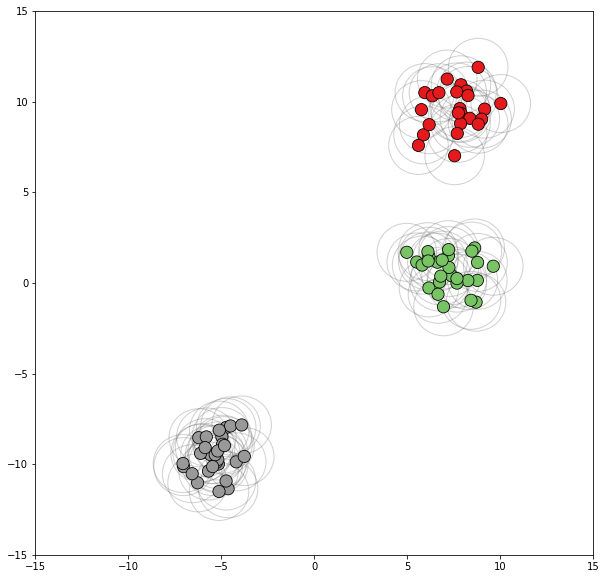

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

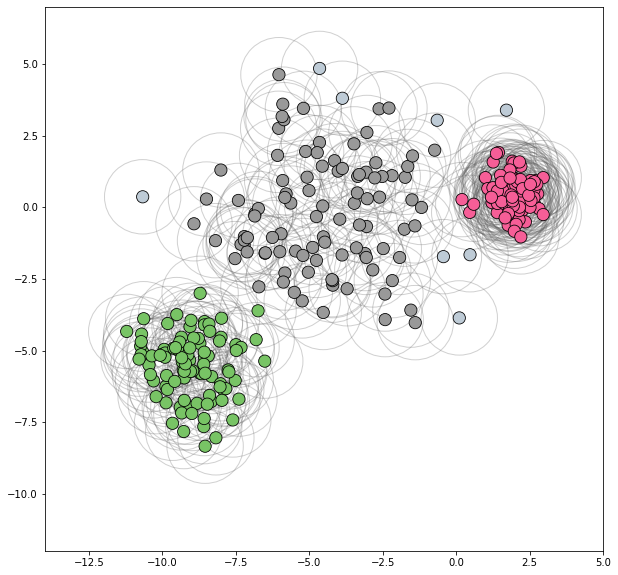

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)

## K Nearest Neighbor

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_X_Y_raw=np.stack((scat_X,scat_Y),axis=1)

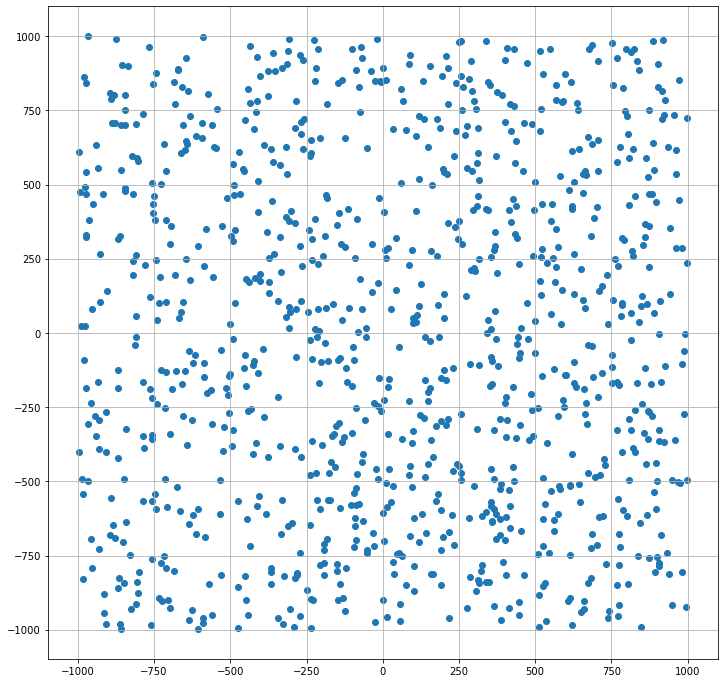

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X,scat_Y)    
plt.grid()

In [15]:
def radius(ndarray, r):
    boolean_mask = ndarray.dot(np.transpose(ndarray)).diagonal()<(r*r)
    return ndarray[boolean_mask]

In [16]:
scat_X_Y = radius(scat_X_Y_raw, 1000)

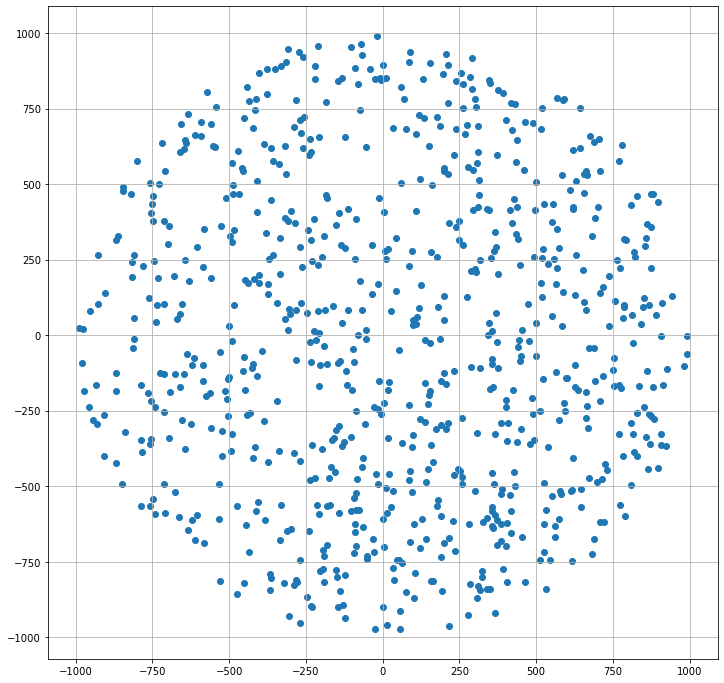

In [17]:
%matplotlib inline
plt.figure(figsize = (12, 12))
plt.scatter(scat_X_Y[:,0],scat_X_Y[:,1]) 
plt.grid()

In [18]:
# Calculates the distance between each point...
n=scat_X_Y.shape[0]
dist_sq = np.zeros([n, n])
for i in range(0,n):
    for j in range(i+1,n):
        dist_sq[i,j]=(scat_X_Y[i]-scat_X_Y[j]).dot(np.transpose((scat_X_Y[i]-scat_X_Y[j])))
dist_sq=dist_sq+np.transpose(dist_sq)

In [19]:
print(dist_sq.astype('int64'))

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739088 1878130 1471157]
 ...
 [3074906 2217113 1739088 ...       0   90634  462437]
 [3018280 2390869 1878130 ...   90634       0  936505]
 [3020445 1796418 1471157 ...  462437  936505       0]]


In [20]:
# Find the nearest neighbor of each point...
nearest = np.zeros([dist_sq.shape[0], dist_sq.shape[0]])
for i in range(0,dist_sq.shape[0]):
    rank_each_i = np.argsort(dist_sq[i])
    nearest[i]=rank_each_i

In [21]:
print(nearest.astype('int64'))

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


In [22]:
def nearest_partition(dist_sq, K):
    nearest = np.zeros([dist_sq.shape[0], K])
    for i in range(0,dist_sq.shape[0]):
        rank_each_i = np.argsort(dist_sq[i])
        nearest[i]=rank_each_i[0:K:1]
    return nearest 

In [23]:
nearest_partition(dist_sq, 3).astype('int64')

array([[  0,  55,  29],
       [  1, 639, 252],
       [  2, 676, 261],
       ...,
       [787, 738, 643],
       [788, 373, 557],
       [789, 295,  19]], dtype=int64)

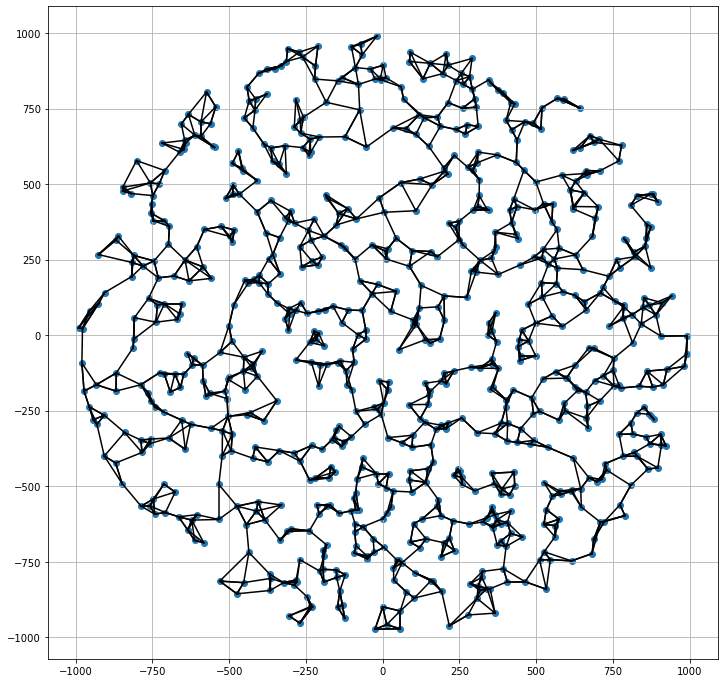

In [24]:
plt.figure(figsize = (12, 12))
plt.scatter(scat_X_Y[:,0],scat_X_Y[:,1]) 
plt.grid()   
# draw lines from each point to its three nearest neighbors
K = 4
KNN=nearest_partition(dist_sq, K)
for i in range(0,KNN.shape[0]):
    for j in range(1,K):
        K_points_near_ith_points=scat_X_Y[KNN[i][[0,j]].astype('int64')]
        plt.plot(K_points_near_ith_points[:,0],K_points_near_ith_points[:,1],color="black")